In [11]:
from numpy.random import uniform
import numpy as np
import matplotlib.pyplot as plt

We can create a $\text{Multinomial}(n,p)$ distribution by chopping the interval $[0,1]$ into sub-intervals of lengths $p$ and then sampling from $\text{Unif}([0,1])$ $n$ times, counting the number of times the sample lies in each sub-interval.

In [12]:
def f(p,x):
    """
    p: 1d numpy array of probabilities
    x: number between 0 and 1
    Cut the interval [0,1] into sub-intervals of lengths
    given by p. Return an array with all entries zero
    except for one entry equal to 1, indicating which sub-interval
    x lies in.
    """ 
    
    # The endpoints of the sub-intervals
    endpoints = np.cumsum(p)
    # An array to store the result of the experiment
    X = np.zeros(len(p))
    
    for i, endpt in enumerate(endpoints):
        if x < endpt:
            # Set X[i] = 1 where i is the number
            # of the interval x lies in
            X[i] = 1
            break
    
    return X

In [13]:
def multinom(n,p,nsim=1):
    """
    Return nsim samples from a Multinomial(n,p) distribution.
    """
    if nsim == 1:
        return np.sum([f(p,uniform()) for _ in range(n)], axis=0)
    return [np.sum([f(p,uniform()) for _ in range(n)], axis=0) for _ in range(nsim)]

To make sure our function works correctly, let's draw some bar charts.

In [14]:
np.random.seed(42)

Text(0.5, 1.0, 'Bar chart for $p=(0.25,0.5,0.25)$')

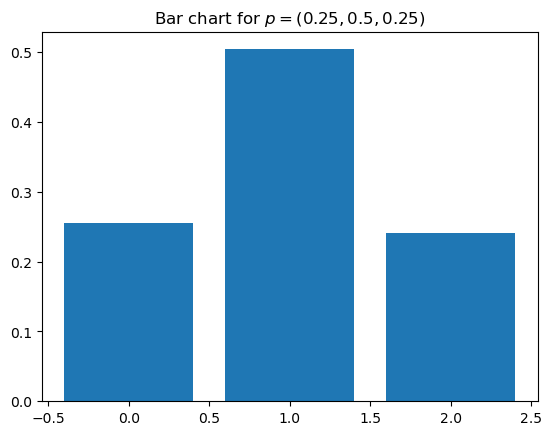

In [15]:
s = multinom(10000,[0.25,0.5,0.25])
prob = s / s.sum()
plt.bar(x=range(3), height=prob)
plt.title(r"Bar chart for $p=(0.25,0.5,0.25)$")

Text(0.5, 1.0, 'Bar chart for $p=(0.1,0.2,0.3,0.4)$')

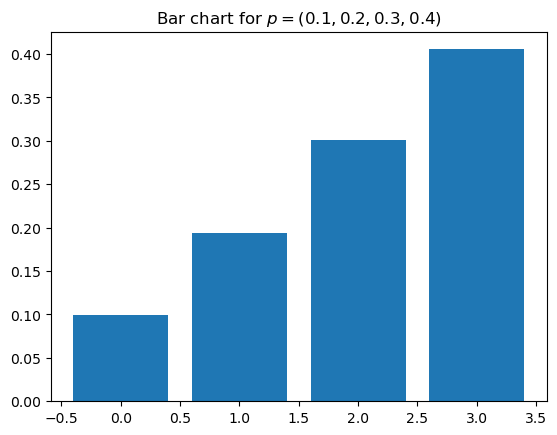

In [16]:
s = multinom(10000,[0.1,0.2,0.3,0.4])
prob = s / s.sum()
plt.bar(x=range(4), height=prob)
plt.title(r"Bar chart for $p=(0.1,0.2,0.3,0.4)$")

Text(0.5, 1.0, 'Bar chart for $p=(0.1,0.2,0.3,0.2,0.1,0.1)$')

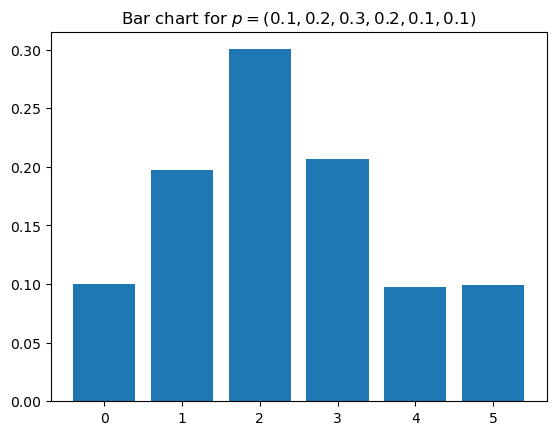

In [17]:
s = multinom(10000,[0.1,0.2,0.3,0.2,0.1,0.1])
prob = s / s.sum()
plt.bar(x=range(6), height=prob)
plt.title(r"Bar chart for $p=(0.1,0.2,0.3,0.2,0.1,0.1)$")